In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.set_option("display.max_rows", None)
sns.set()

df = pd.read_csv('application_train.csv')

dum_cols = ['SK_ID_CURR']
y_col = 'TARGET'
feat_cols = list(set(df.columns) - set(dum_cols + [y_col]))

## Target Distribution

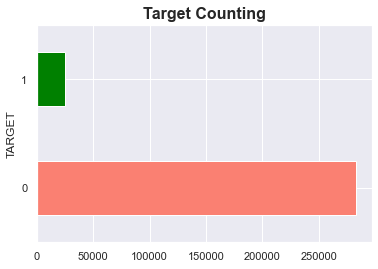

In [141]:
df['TARGET'].value_counts().plot.barh(color=['salmon', 'green'])
plt.title('Target Counting', fontsize=16, fontweight='bold')
plt.ylabel('TARGET')
plt.show()

## Missing Value Filter

In [22]:
def missing_check(df):
    res = pd.Series(dtype='float64')
    for col in df.columns:
        res[col] = df[col].isna().sum() / len(df[col])
        
    return res[res != 0].sort_values(ascending=False)

missing_threshold = 0.4
miss_col_info = missing_check(df[feat_cols])
# miss_col_info[miss_col_info > missing_threshold]
feat_cols = [col for col in feat_cols if col not in miss_col_info[miss_col_info > missing_threshold].index]

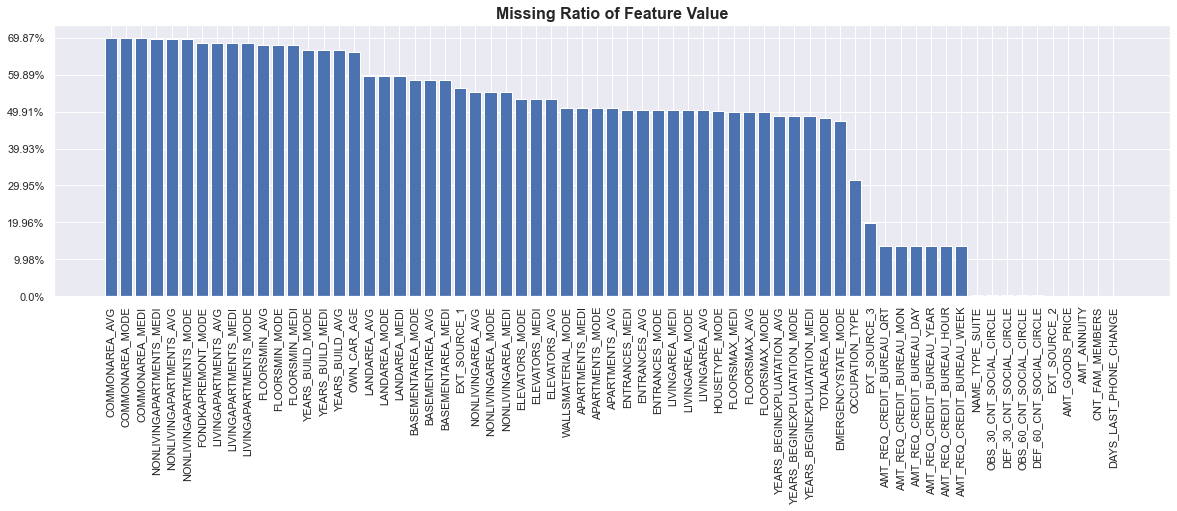

In [142]:
fig = plt.figure(figsize=(20, 5))
plt.bar(range(miss_col_info.size), miss_col_info.values)
plt.xticks(range(miss_col_info.size), miss_col_info.index.tolist(), rotation=90)
y_scaler = np.linspace(0, miss_col_info.max(), 8)
plt.yticks(y_scaler, [f'{round(v * 100, 2)}%' for v in y_scaler])
# plt.set_xticklabels(stats_info.index.tolist())
plt.title('Missing Ratio of Feature Value', fontsize=16, fontweight='bold')
plt.show()

## Feature Correlation 

interval columns not set, guessing: ['FLAG_DOCUMENT_21', 'LIVE_REGION_NOT_WORK_REGION', 'HOUR_APPR_PROCESS_START', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_20', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_19', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_5', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_GOODS_PRICE', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_7', 'FLAG_MOBIL', 'AMT_INCOME_TOTAL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_6', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_EMAIL', 'DAYS_REGISTRATION', 'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_PHONE', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_10', 'REG_REGION_NOT_WORK_REGION', 'FLAG_EMP_PHONE', 'FLAG_DOCU

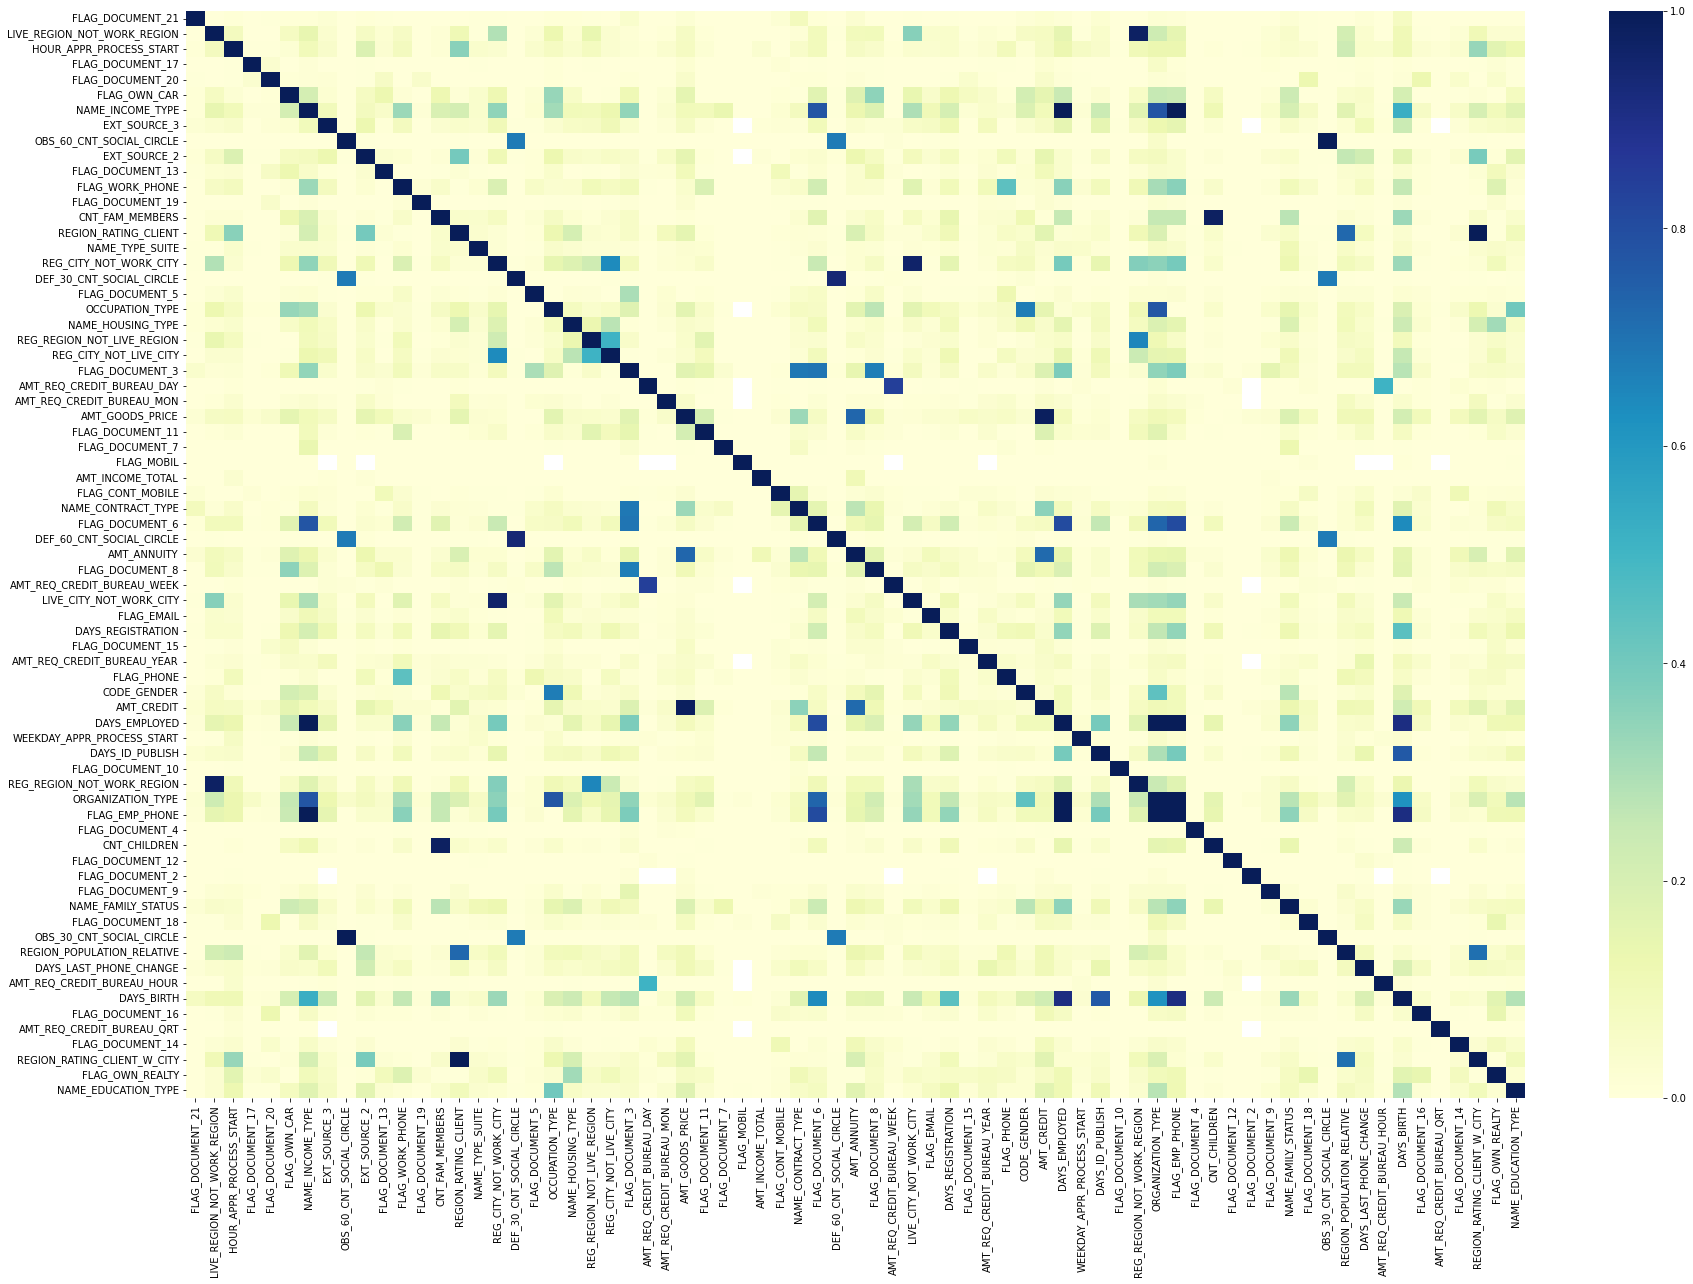

In [59]:
# numeric feature correlation
plt.figure(figsize=(30, 20))
# numeric_cor = df[feat_cols].corr()
feat_cor = phik.phik_matrix(df[feat_cols])
sns.heatmap(feat_cor, cmap='YlGnBu')

plt.show()

## Categorical Information

In [143]:
cat_cols = df[feat_cols].select_dtypes(include=['object']).columns
stats_info = df[cat_cols].apply(lambda x: x.nunique(), axis=0)

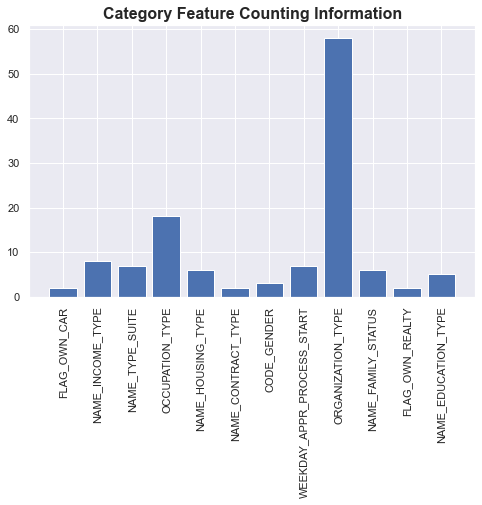

In [144]:
fig = plt.figure(figsize=(8, 5))
plt.bar(range(stats_info.size), stats_info.values)
plt.xticks(range(stats_info.size), stats_info.index.tolist(), rotation=90)
# plt.set_xticklabels(stats_info.index.tolist())
plt.title('Category Feature Counting Information', fontsize=16, fontweight='bold')
plt.show()

## Feature Distribution

In [108]:
selected_cols = ['AMT_ANNUITY', 'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG',
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'LANDAREA_MEDI',
       'DAYS_BIRTH', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'LANDAREA_MODE',
       'REGION_POPULATION_RELATIVE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'BASEMENTAREA_MEDI', 'AMT_GOODS_PRICE', 'BASEMENTAREA_MODE',
       'LIVINGAREA_MEDI']

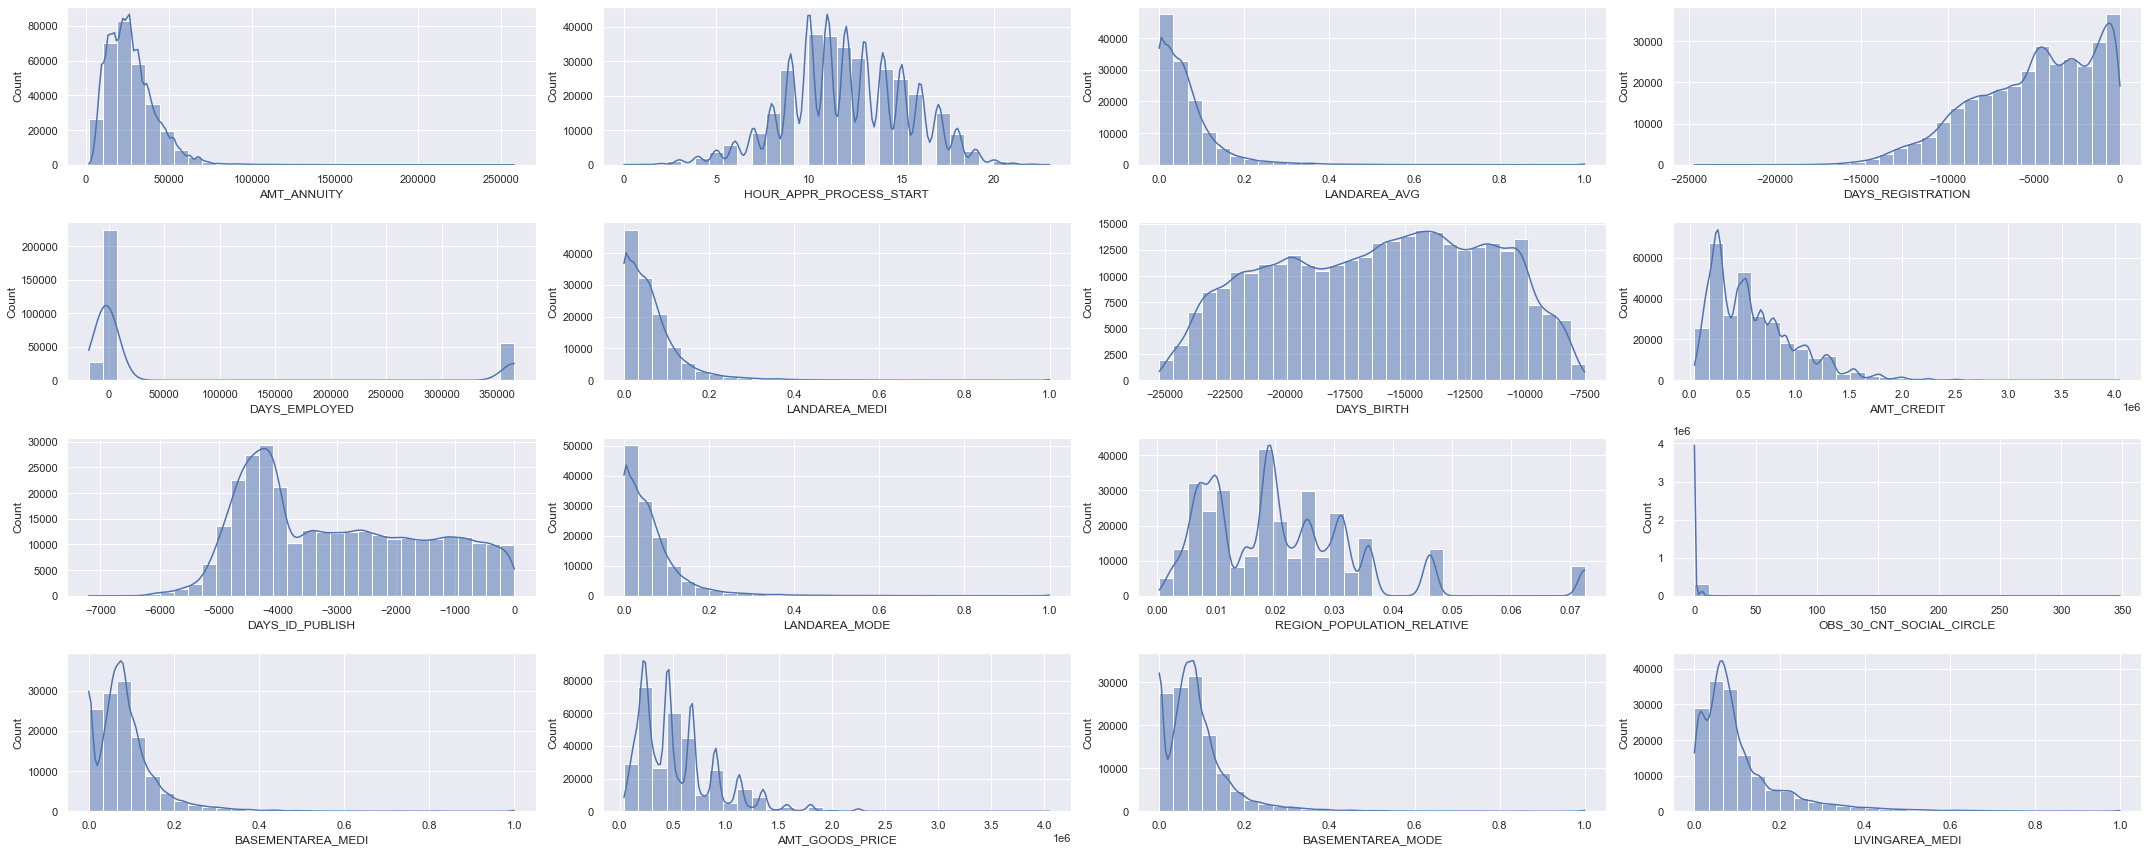

In [164]:
fig, ax = plt.subplots(4, 4, figsize=(30, 12))
for i in range(len(selected_cols)):
    r, c = i // 4, i % 4
    sns.histplot(data=df, x=selected_cols[i], bins=30, kde=True, ax=ax[r, c])
    
plt.tight_layout()
plt.show()

## Anomaly Analysis

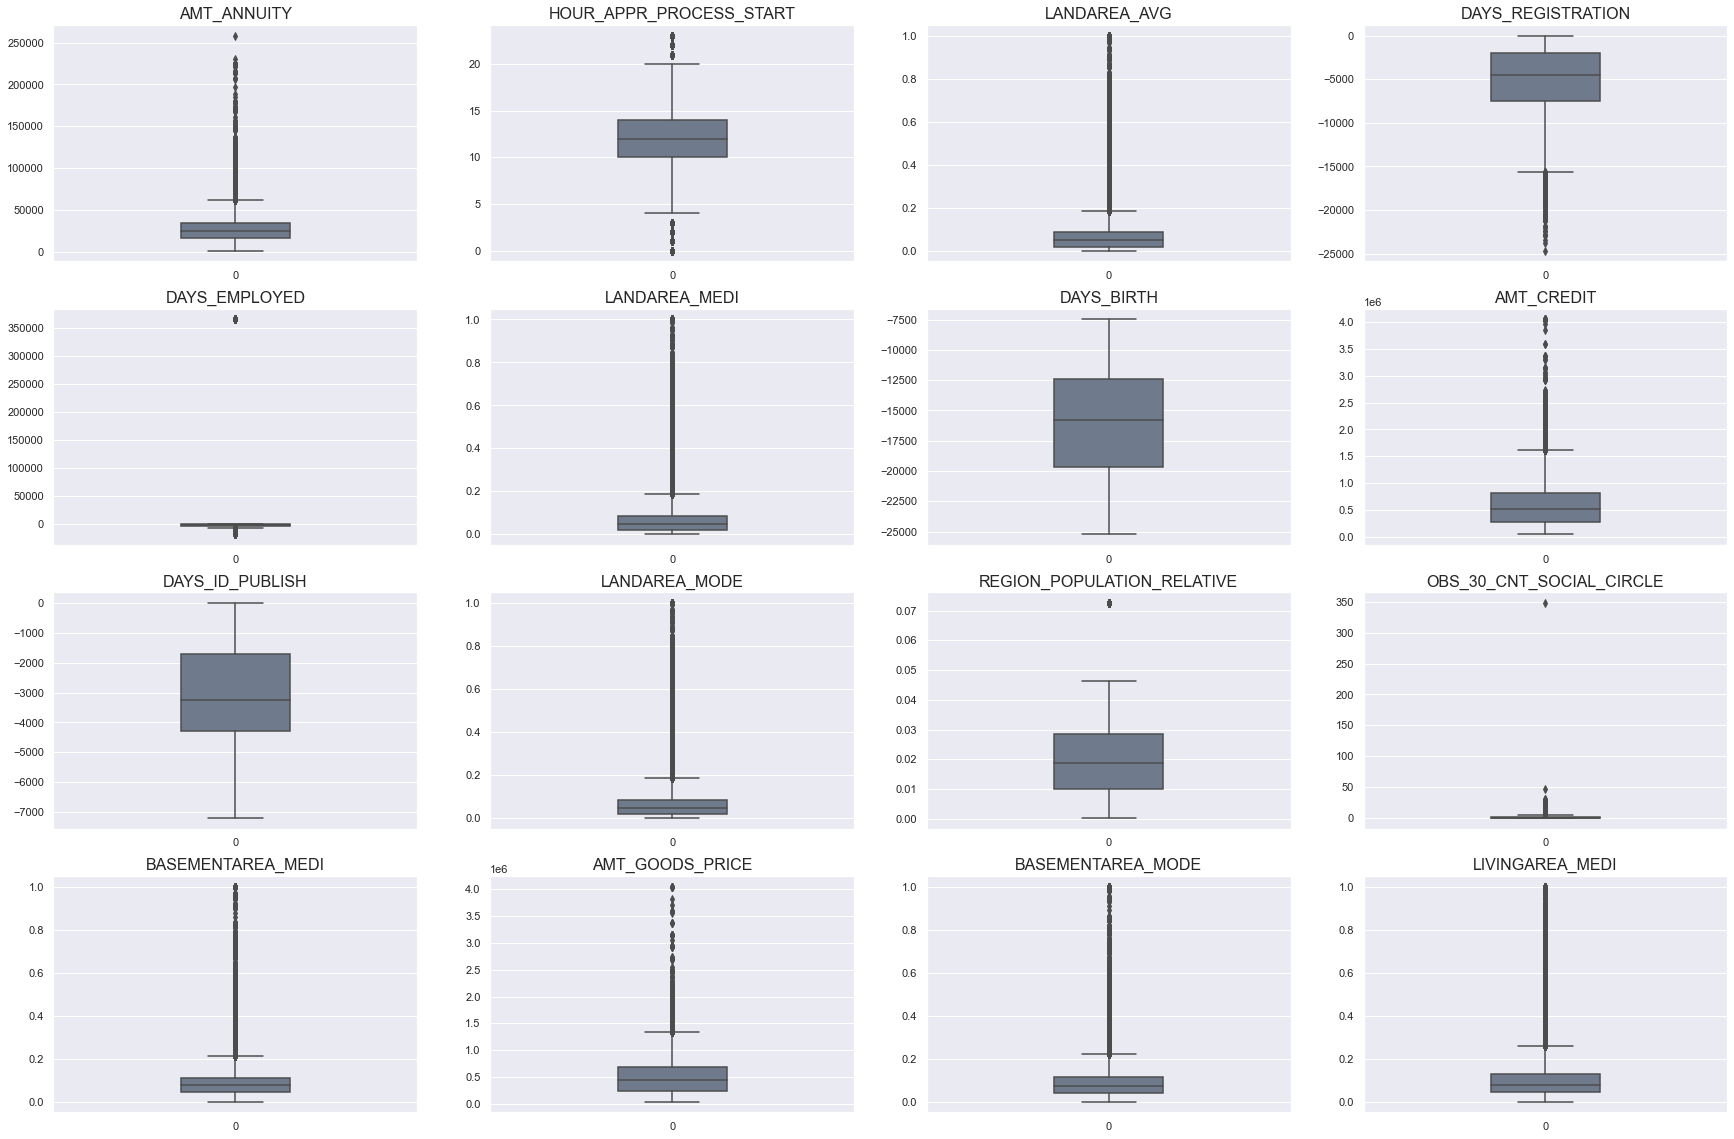

In [159]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(30,20))
i=0
for c in selected_cols:   
    sns.boxplot(data=df[c], ax=axes[i // 4,i % 4], width=0.3, saturation=0.3)
    axes[i // 4,i % 4].set_title(c, fontsize=16)
    i+=1 